# [PDF Loader](https://python.langchain.com/docs/integrations/document_loaders/#pdfs)

## PyPDFLoader:
- `특징`: 가장 기본적인 PDF 로더 중 하나로, pypdf 라이브러리를 사용합니다. 단순하고 깨끗한 텍스트 위주의 PDF에서 텍스트를 추출하는 데 효율적입니다. 각 페이지를 별도의 Document 객체로 로드합니다.
- `장점`: 사용이 간편하고, 빠른 텍스트 추출이 가능합니다. 파일 크기가 큰 경우에도 비교적 효율적입니다.
- `사용 예시`: 대부분의 일반적인 PDF 문서에서 텍스트를 추출할 때 적합합니다.

## PyMuPDFLoader (Fitz):
- `특징`: PyMuPDF 라이브러리를 기반으로 하며, 텍스트 추출뿐만 아니라 이미지, 주석 등 PDF의 다양한 정보를 가져오는 데 뛰어난 성능을 보여줍니다. 페이지별 접근이 용이하여 정교한 처리가 필요할 때 유용합니다.
- `장점`: 고해상도 이미지 처리, 복잡한 레이아웃 분석 등 고급 기능이 필요할 때 강점을 보입니다.
- `사용 예시`: 이미지나 도표가 많거나, 문서의 시각적인 요소도 분석해야 하는 경우에 좋습니다.

## UnstructuredPDFLoader:
- `특징`: Unstructured 라이브러리를 사용하여 PDF 파일의 구조를 분석하고 텍스트, 테이블, 이미지를 효율적으로 추출합니다. 비정형 데이터 처리에 강력하며, 문서의 레이아웃에 덜 의존적인 방식으로 작동합니다.
- `장점`: 스캔된 PDF나 복잡한 레이아웃을 가진 PDF에서 정확한 텍스트 및 구조 추출에 유용합니다.
- `사용 예시`: 스캔된 문서, 다양한 형식의 보고서 등 구조가 불규칙한 PDF에 적합합니다.

## PDFPlumberLoader:
- `특징`: PDFPlumber를 사용하여 PDF 파일의 텍스트와 테이블을 추출합니다. 각 페이지별 상세한 메타데이터를 제공하며, 테이블 데이터 추출에 특히 강점을 보입니다.
- `장점`: 테이블 데이터가 많은 PDF에서 테이블 구조를 유지하며 데이터를 추출하는 데 매우 효과적입니다.
- `사용 예시`: 재무 보고서, 데이터가 포함된 표가 많은 문서 등에서 테이블 정보를 정확하게 추출하고 싶을 때 좋습니다.

# 선택 가이드라인:
- 단순 텍스트 위주 PDF: `PyPDFLoader` 또는 `PyMuPDFLoader`
- 복잡한 레이아웃 또는 스캔된 PDF: `UnstructuredPDFLoader`, `AmazonTextractPDFLoader`
- 테이블 데이터 추출이 중요할 때: `PDFPlumberLoader`, `UnstructuredPDFLoader`, `AmazonTextractPDFLoader`
- 이미지/주석 등 시각적 요소 포함: `PyMuPDFLoader`

# 예제

## PDF 파일들

In [ ]:
pdf_attention = "data/Attention Is All You Need.pdf"
pdf_bert = "data/BERT.pdf"
pdf_lg_aimers = "data/LG Aimers 4기 소개자료.pdf"

## pypdf
- `설명`: PyPDF2를 기반으로 PDF 문서의 텍스트를 추출합니다.
- `장점`: 빠르고 설치가 간편하며 대부분의 PDF에서 잘 작동.
- `단점`: 이미지 기반 PDF나 복잡한 레이아웃에서는 품질 저하 가능.

### [PyPDFLoader](https://python.langchain.com/docs/integrations/document_loaders/pypdfloader/)

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(pdf_lg_aimers)

In [ ]:
docs = loader.load()
len(docs)

15

In [ ]:
docs[0].metadata

{'producer': 'pdfTeX-1.40.25',
 'creator': 'LaTeX with hyperref',
 'creationdate': '2024-04-10T21:11:43+00:00',
 'author': '',
 'keywords': '',
 'moddate': '2024-04-10T21:11:43+00:00',
 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5',
 'subject': '',
 'title': '',
 'trapped': '/False',
 'source': 'data/Attention Is All You Need.pdf',
 'total_pages': 15,
 'page': 0,
 'page_label': '1'}

In [ ]:
docs[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurren

### [pypdf](https://github.com/py-pdf/pypdf)

#### 메타정보 추출

In [ ]:
from pypdf import PdfReader

# PDF 파일 열기
reader = PdfReader(pdf_attention)

# 메타데이터 가져오기
metadata = reader.metadata

# 출력
print("📄 PDF 메타데이터:")
for key, value in metadata.items():
    print(f"{key}: {value}")

📄 PDF 메타데이터:
/CreationDate: D:20250715074032+00'00'
/ModDate: D:20250715074032+00'00'


#### 텍스트 추출

In [ ]:
from pypdf import PdfReader

# Open the PDF file"
reader = PdfReader(pdf_attention)

# Iterate through all the pages in the PDF document
for i in reader.pages:
    # Extract and print the text content of each page
    print(i.extract_text())

LG AI연구원｜
LG Aimers 소개 자료
1. LG Aimers 프로그램 개요
❑교육과 경험의 기회를 필요로 하는 청년들에게 양질의 AI교육을 온라인으로 제공하고, 기업의 실제 data를 다루며 
실무를 경험할 수 있는 기회를 제공하기 위해 『온라인 AI전문가 과정(1개월)』 과 『AI 해커톤 (Hackathon)(1개월)』을 
결합한 형태의 교육 프로그램
- 온라인 AI 교육 과정 : 국내 AI 전문가 (현업 전문가, 저명 교수)의 최신 AI 기법에 관한 온라인 강의(1개월)
• 온라인 초급 교육은 기초적인 프로그래밍데이터 처리에 관련된 내용들로써 외부 교육 콘텐츠를 활용(optional)
• 초급 교육은 자료구조와 알고리즘 등 컴퓨팅 관련 기본 소양 교육
• 온라인 중상급 교육은 국내 AI 분야 전문가들이 주제별로 강의 (LG 자체 개발- 부록 참조)
• 중상급 교육은 대학원 수준의 AI 요소 기술 및 이론에 관한 교육으로 이루어져 있음
• 중상급 교육을 받기 전에 학부 수준의 ‘인공지능 개론’ 과목을 이수하는 것을 추천
- 온라인 AI 해커톤 : LG계열사의 문제를 현장의 실제 data를 활용하여 해결하는 해커톤 예선(1개월)
- 오프라인 AI 해커톤 : 온라인 해커톤에서 선발된 본선 진출자들만 참가 (1박2일)
❑수료 조건 : 온라인 AI전문가 과정 이수(교육영상 100% 이수 및 퀴즈참여) & AI 해커톤 baseline model 성능 이상
수료자에 한하여 수료증 발급 
❑대상 및 규모 : 만 19세에서 29세의 청년 (미취업자 대상)
❑운영 일정 : 매년 연 2회 진행. 여름방학(7~8월), 겨울방학(1~2월)
❑LG Aimers 채널: https://lgaimers.ai/
교육 콘텐츠
온라인
초급 콘텐츠
(외부)
+
온라인
중/상급 콘텐츠
(내부)
+
LG 
AI연구위원
온라인 특강
해커톤
(1달 과정) 
(총 4주간 진행) 
과제부여
(Data Set)
대회 진행
(리더보드 운영)
합숙경연
(1박 2일)
최종평가
(상위팀 PT)
예선 종료

#### with Langchain Document

In [ ]:
from pypdf import PdfReader
from langchain_core.documents import Document

# Open the PDF file"
reader = PdfReader(pdf_attention)
dict_metadata = dict(reader.metadata)
documents = []

# Iterate through all the pages in the PDF document
for i, page in enumerate(reader.pages):
    # Extract and print the text content of each page
    dict_metadata['page_no'] = i+1
    documents.append(Document(
        page_content=page.extract_text(),
        metadata=dict_metadata
    ))

In [ ]:
len(documents)

7

In [ ]:
documents[0].metadata

{'/CreationDate': "D:20250715074032+00'00'",
 '/ModDate': "D:20250715074032+00'00'",
 'page_no': 1}

In [ ]:
documents[0].page_content

'LG AI연구원｜\nLG Aimers 소개 자료'

#### 이미지 추출

In [ ]:
from pypdf import PdfReader

# Open the PDF file
reader = PdfReader(pdf_attention)

# Initialize a counter to keep track of the extracted images
count = 0

# Iterate through each page in the PDF document
for page in reader.pages:

    # Iterate through the images on the current page
    for image_file_object in page.images:

        # Open and write the image data
        image_names = image_file_object.name.split(".")
        with open(f"{image_names[0]}_{str(count)}.{image_names[1]}", "wb") as fp:
            fp.write(image_file_object.data)
            count += 1

## pdfplumber
- `설명`: pdfplumber를 사용하여 PDF의 레이아웃 및 테이블 구조까지 고려해 텍스트를 추출.
- `장점`: 테이블 추출 정확도가 높고, 레이아웃 유지에 강함.
- `단점`: 속도가 느릴 수 있음.

### [PDFPlumberLoader](https://python.langchain.com/docs/integrations/document_loaders/pdfplumber/)

In [ ]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader(pdf_lg_aimers)

In [ ]:
docs = loader.load()
len(docs)

15

In [ ]:
docs[0].metadata

{'source': 'data/Attention Is All You Need.pdf',
 'file_path': 'data/Attention Is All You Need.pdf',
 'page': 0,
 'total_pages': 15,
 'Author': '',
 'CreationDate': 'D:20240410211143Z',
 'Creator': 'LaTeX with hyperref',
 'Keywords': '',
 'ModDate': 'D:20240410211143Z',
 'PTEX.Fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5',
 'Producer': 'pdfTeX-1.40.25',
 'Subject': '',
 'Title': '',
 'Trapped': 'False'}

In [ ]:
print(docs[0].page_content)

Providedproperattributionisprovided,Googleherebygrantspermissionto
reproducethetablesandfiguresinthispapersolelyforuseinjournalisticor
scholarlyworks.
Attention Is All You Need
AshishVaswani∗ NoamShazeer∗ NikiParmar∗ JakobUszkoreit∗
GoogleBrain GoogleBrain GoogleResearch GoogleResearch
avaswani@google.com noam@google.com nikip@google.com usz@google.com
LlionJones∗ AidanN.Gomez∗ † ŁukaszKaiser∗
GoogleResearch UniversityofToronto GoogleBrain
llion@google.com aidan@cs.toronto.edu lukaszkaiser@google.com
IlliaPolosukhin∗ ‡
illia.polosukhin@gmail.com
Abstract
Thedominantsequencetransductionmodelsarebasedoncomplexrecurrentor
convolutionalneuralnetworksthatincludeanencoderandadecoder. Thebest
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
basedsolelyonattentionmechanisms,dispensingwithrecurrenceandconvolutions
entirely. Experiments on two machine translation tasks show these models to
besupe

### [pdfplumber](https://github.com/jsvine/pdfplumber)

In [ ]:
import pdfplumber

#### 메타정보 추출

In [ ]:
with pdfplumber.open(pdf_bert) as pdf:
    metadata = pdf.metadata
    print(metadata)

{'Author': '', 'CreationDate': 'D:20190528000751Z', 'Creator': 'LaTeX with hyperref package', 'Keywords': '', 'ModDate': 'D:20190528000751Z', 'PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) kpathsea version 6.2.2', 'Producer': 'pdfTeX-1.40.17', 'Subject': '', 'Title': '', 'Trapped': 'False'}


#### 텍스트 추출

In [ ]:
with pdfplumber.open(pdf_bert) as pdf:
    text = pdf.pages[0].extract_text()
    print(text)

BERT: Pre-training of Deep Bidirectional Transformers for
Language Understanding
JacobDevlin Ming-WeiChang KentonLee KristinaToutanova
GoogleAILanguage
{jacobdevlin,mingweichang,kentonl,kristout}@google.com
Abstract There are two existing strategies for apply-
ingpre-trainedlanguage representations todown-
We introduce a new language representa-
stream tasks: feature-based and fine-tuning. The
tion model called BERT, which stands for
feature-based approach, such as ELMo (Peters
Bidirectional Encoder Representations from
Transformers. Unlike recent language repre- et al., 2018a), uses task-specific architectures that
sentation models (Peters et al., 2018a; Rad- include the pre-trained representations as addi-
ford et al., 2018), BERT is designed to pre- tional features. The fine-tuning approach, such as
train deep bidirectional representations from the Generative Pre-trained Transformer (OpenAI
unlabeledtextbyjointlyconditioningonboth
GPT) (Radford et al., 2018), introduces minimal
left

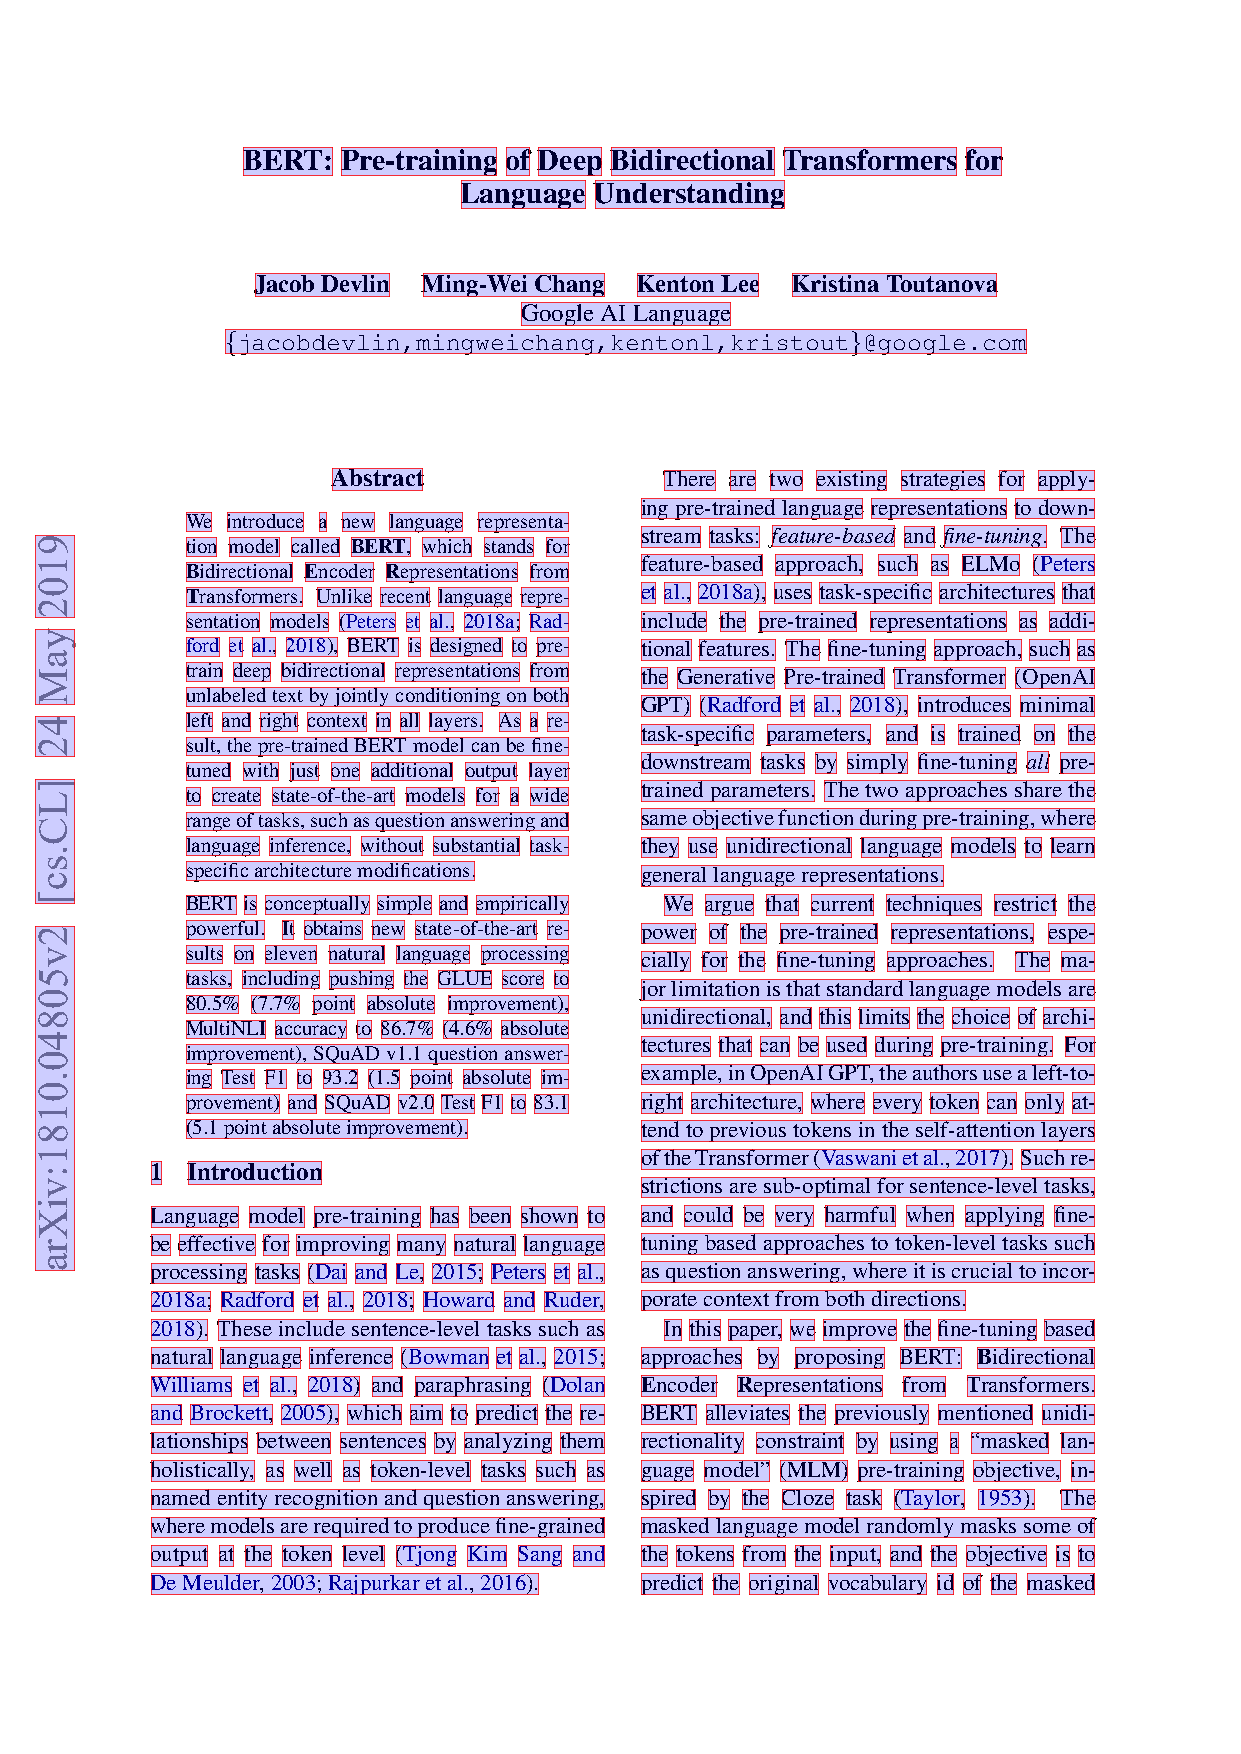

In [ ]:
with pdfplumber.open(pdf_bert) as pdf:
    pages = pdf.pages
    im = pages[0].to_image(resolution=150)
    im.draw_rects(pages[0].extract_words())

im

#### with Langchain Document

In [ ]:
import pdfplumber
from langchain_core.documents import Document

# Open the PDF file"
documents = []

with pdfplumber.open(pdf_bert) as pdf:
    dict_metadata = pdf.metadata

    # Iterate through all the pages in the PDF document
    for i, page in enumerate(pdf.pages):
        # Extract and print the text content of each page
        dict_metadata['page_no'] = i+1
        documents.append(Document(
            page_content=page.extract_text(),
            metadata=dict_metadata
        ))

In [ ]:
len(documents)

16

In [ ]:
documents[0].metadata

{'Author': '',
 'CreationDate': 'D:20190528000751Z',
 'Creator': 'LaTeX with hyperref package',
 'Keywords': '',
 'ModDate': 'D:20190528000751Z',
 'PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) kpathsea version 6.2.2',
 'Producer': 'pdfTeX-1.40.17',
 'Subject': '',
 'Title': '',
 'Trapped': 'False',
 'page_no': 1}

In [ ]:
documents[0].page_content

'BERT: Pre-training of Deep Bidirectional Transformers for\nLanguage Understanding\nJacobDevlin Ming-WeiChang KentonLee KristinaToutanova\nGoogleAILanguage\n{jacobdevlin,mingweichang,kentonl,kristout}@google.com\nAbstract There are two existing strategies for apply-\ningpre-trainedlanguage representations todown-\nWe introduce a new language representa-\nstream tasks: feature-based and fine-tuning. The\ntion model called BERT, which stands for\nfeature-based approach, such as ELMo (Peters\nBidirectional Encoder Representations from\nTransformers. Unlike recent language repre- et al., 2018a), uses task-specific architectures that\nsentation models (Peters et al., 2018a; Rad- include the pre-trained representations as addi-\nford et al., 2018), BERT is designed to pre- tional features. The fine-tuning approach, such as\ntrain deep bidirectional representations from the Generative Pre-trained Transformer (OpenAI\nunlabeledtextbyjointlyconditioningonboth\nGPT) (Radford et al., 2018), intro